# Importing Libraries

In [1]:
#!pip install torch-spline-conv
#!pip install torch-geometric-temporal --no-dependencies

In [2]:
import torchvision
import torchaudio
import pandas
import gensim
import torch_scatter
import torch_sparse
import torch_cluster
import setuptools.dist
#import torch-spline-conv
import torch_geometric
import networkx
import matplotlib
import node2vec
import seaborn
import sklearn
import tensorflow
import deepchem
#import torch_geometric_temporal
import captum

/Users/ishaanpaul/Desktop/Extras/Graph-Neural-Network/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Chapter 2 - Graph Theory

In [3]:
import networkx as nx

In [4]:
# To create a unweighted, undirected graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')])

In [5]:
# To create a directed graph
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')])

In [6]:
# To create a weighted graph
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C',
{"weight": 20}), ('B', 'D', {"weight": 30}), ('B', 'E',
{"weight": 40}), ('C', 'F', {"weight": 50}), ('C', 'G',
{"weight": 60})])
labels = nx.get_edge_attributes(WG, "weight")

In [7]:
# To create connected graphs
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
# This should come back as false since 1,2,3 are connected and 4,5 is disconnected
print(f"Is graph 1 connected? {nx.is_connected(G1)}")
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
# This should come back as true since there is a path between any nodes u, v in graph G2
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


In [8]:
# Calculating the degree of a node in an undirected graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B',
'E'), ('C', 'F'), ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

deg(A) = 2


In [9]:
# Calculating the degree of a node in a directed graph
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B',
'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg^-(A) = 0
deg^+(A) = 2


In [10]:
# Finding the following measures related to a graph
# 1. Degree Centrality - Degree of a node. The higher the degree is, the more influential the node is
# 2. Closeness Centrality - Average length of the shortest path between the target node and all other nodes. Node with high closeness centrality can reach other nodes very easily
# 3. Betweenness Centrality - How often a node appears in the shortest path of 2 other nodes. It identifies bottlenecks or bridges
print(f"Degree centrality = {nx.degree_centrality(G)}")
print(f"Closeness centrality = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [11]:
# Creating an adjacency matrix
# This is great for matrix operations as well as checking the connectivity of two nodes in constant time
# Its space complexity is O(|V|^2) and is therefore difficult to resize and add new nodes, especially for larger graphs
adj = [[0,1,1,0,0,0,0],
[1,0,0,1,1,0,0],
[1,0,0,0,0,1,1],
[0,1,0,0,0,0,0],
[0,1,0,0,0,0,0],
[0,0,1,0,0,0,0],
[0,0,1,0,0,0,0]]

In [12]:
# An alternative to an adjacency matrix
# Space complexity O(|E|)
# Retrieving connectivity of two nodes requires traversing the list and therefore is more useful for situations where space is a concern
edge_list = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]

In [13]:
# Another way of representation is the adjacency list
# Space complexity: O(|V|+|E|)
# It allows for efficient iteration through the adjacent vertices of a node
# checking whether two vertices are connected can be slower than with an adjacency matrix.
adj_list = {
0: [1, 2],
1: [0, 3, 4],
2: [0, 5, 6],
3: [1],
4: [1],
5: [2],
6: [2]
}

Breadth-First Search

BFS is particularly useful in finding the shortest path between two nodes in an unweighted graph
In addition to finding the shortest path, BFS can also be used to check whether a graph is connected or to find all connected components of a graph.
The time complexity of BFS is O(|V| + |E|)

In [14]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')])

In [15]:
def bfs(graph, node):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

In [16]:
bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

Depth-First Search

DFS is useful in solving various problems, such as finding connected components, topological sorting, and solving maze problems. It is particularly useful in finding cycles in a graph since it traverses the graph in a depth-first order, and a cycle exists if, and only if, a node is visited twice during the traversal. The time complexity is the same as BFS i.e. O(|V| + |E|)

In [17]:
visited = []
def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)
    return visited

In [18]:
dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']

# Chapter 3 - Node Representations

In [19]:
# Creating skip-grams
import numpy as np
CONTEXT_SIZE = 2

In [20]:
text = """Lorem ipsum dolor sit amet, consectetur
adipiscing elit. Nunc eu sem scelerisque, dictum eros
aliquam, accumsan quam. Pellentesque tempus, lorem ut
semper fermentum, ante turpis accumsan ex, sit amet
ultricies tortor erat quis nulla. Nunc consectetur ligula
sit amet purus porttitor, vel tempus tortor scelerisque.
Vestibulum ante ipsum primis in faucibus orci luctus
et ultrices posuere cubilia curae; Quisque suscipit
ligula nec faucibus accumsan. Duis vulputate massa sit
amet viverra hendrerit. Integer maximus quis sapien id
convallis. Donec elementum placerat ex laoreet gravida.
Praesent quis enim facilisis, bibendum est nec, pharetra
ex. Etiam pharetra congue justo, eget imperdiet diam
varius non. Mauris dolor lectus, interdum in laoreet
quis, faucibus vitae velit. Donec lacinia dui eget
maximus cursus. Class aptent taciti sociosqu ad litora
torquent per conubia nostra, per inceptos himenaeos.
Vivamus tincidunt velit eget nisi ornare convallis.
Pellentesque habitant morbi tristique senectus et netus
et malesuada fames ac turpis egestas. Donec tristique
ultrices tortor at accumsan.
""".split()

In [21]:
skipgrams = []
for i in range(CONTEXT_SIZE, len(text)-CONTEXT_SIZE):
    #For all words CONTEXT_SIZE behind and in front of a word, if target and context word are not the same, add it to the skipgrams array
    array = [text[j] for j in np.arange(i-CONTEXT_SIZE, i+CONTEXT_SIZE + 1) if j != i]
    skipgrams.append((text[i], array))

In [22]:
#Print first two of all the skipgrams
print(skipgrams[0:2])

[('dolor', ['Lorem', 'ipsum', 'sit', 'amet,']), ('sit', ['ipsum', 'dolor', 'amet,', 'consectetur'])]


Skip-Gram Model

In [23]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"Length of vocabulary - {VOCAB_SIZE}")

Length of vocabulary - 121


In [24]:
vocab

{'Class',
 'Donec',
 'Duis',
 'Etiam',
 'Integer',
 'Lorem',
 'Mauris',
 'Nunc',
 'Pellentesque',
 'Praesent',
 'Quisque',
 'Vestibulum',
 'Vivamus',
 'ac',
 'accumsan',
 'accumsan.',
 'ad',
 'adipiscing',
 'aliquam,',
 'amet',
 'amet,',
 'ante',
 'aptent',
 'at',
 'bibendum',
 'congue',
 'consectetur',
 'conubia',
 'convallis.',
 'cubilia',
 'curae;',
 'cursus.',
 'diam',
 'dictum',
 'dolor',
 'dui',
 'egestas.',
 'eget',
 'elementum',
 'elit.',
 'enim',
 'erat',
 'eros',
 'est',
 'et',
 'eu',
 'ex',
 'ex,',
 'ex.',
 'facilisis,',
 'fames',
 'faucibus',
 'fermentum,',
 'gravida.',
 'habitant',
 'hendrerit.',
 'himenaeos.',
 'id',
 'imperdiet',
 'in',
 'inceptos',
 'interdum',
 'ipsum',
 'justo,',
 'lacinia',
 'laoreet',
 'lectus,',
 'ligula',
 'litora',
 'lorem',
 'luctus',
 'malesuada',
 'massa',
 'maximus',
 'morbi',
 'nec',
 'nec,',
 'netus',
 'nisi',
 'non.',
 'nostra,',
 'nulla.',
 'orci',
 'ornare',
 'per',
 'pharetra',
 'placerat',
 'porttitor,',
 'posuere',
 'primis',
 'purus'

In [25]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec([text],
sg=1, # Skip-gram
vector_size=10,
min_count=0,
window=2,
workers=2,
seed=0)

In [26]:
print(f'Shape of W_embed: {model.wv.vectors.shape}')

Shape of W_embed: (121, 10)


In [27]:
model.train([text], total_examples=model.corpus_count,
epochs=10)

(690, 1560)

In [28]:
print('Word embedding =')
print(model.wv[0])

Word embedding =
[ 0.07156403  0.03257632  0.00209916 -0.04374931 -0.03398107 -0.08656936
 -0.09047253 -0.09552431 -0.06482638  0.0660186 ]


DeepWalk Model

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(0)

In [30]:
G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

/Users/ishaanpaul/Desktop/Extras/Graph-Neural-Network/.venv/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


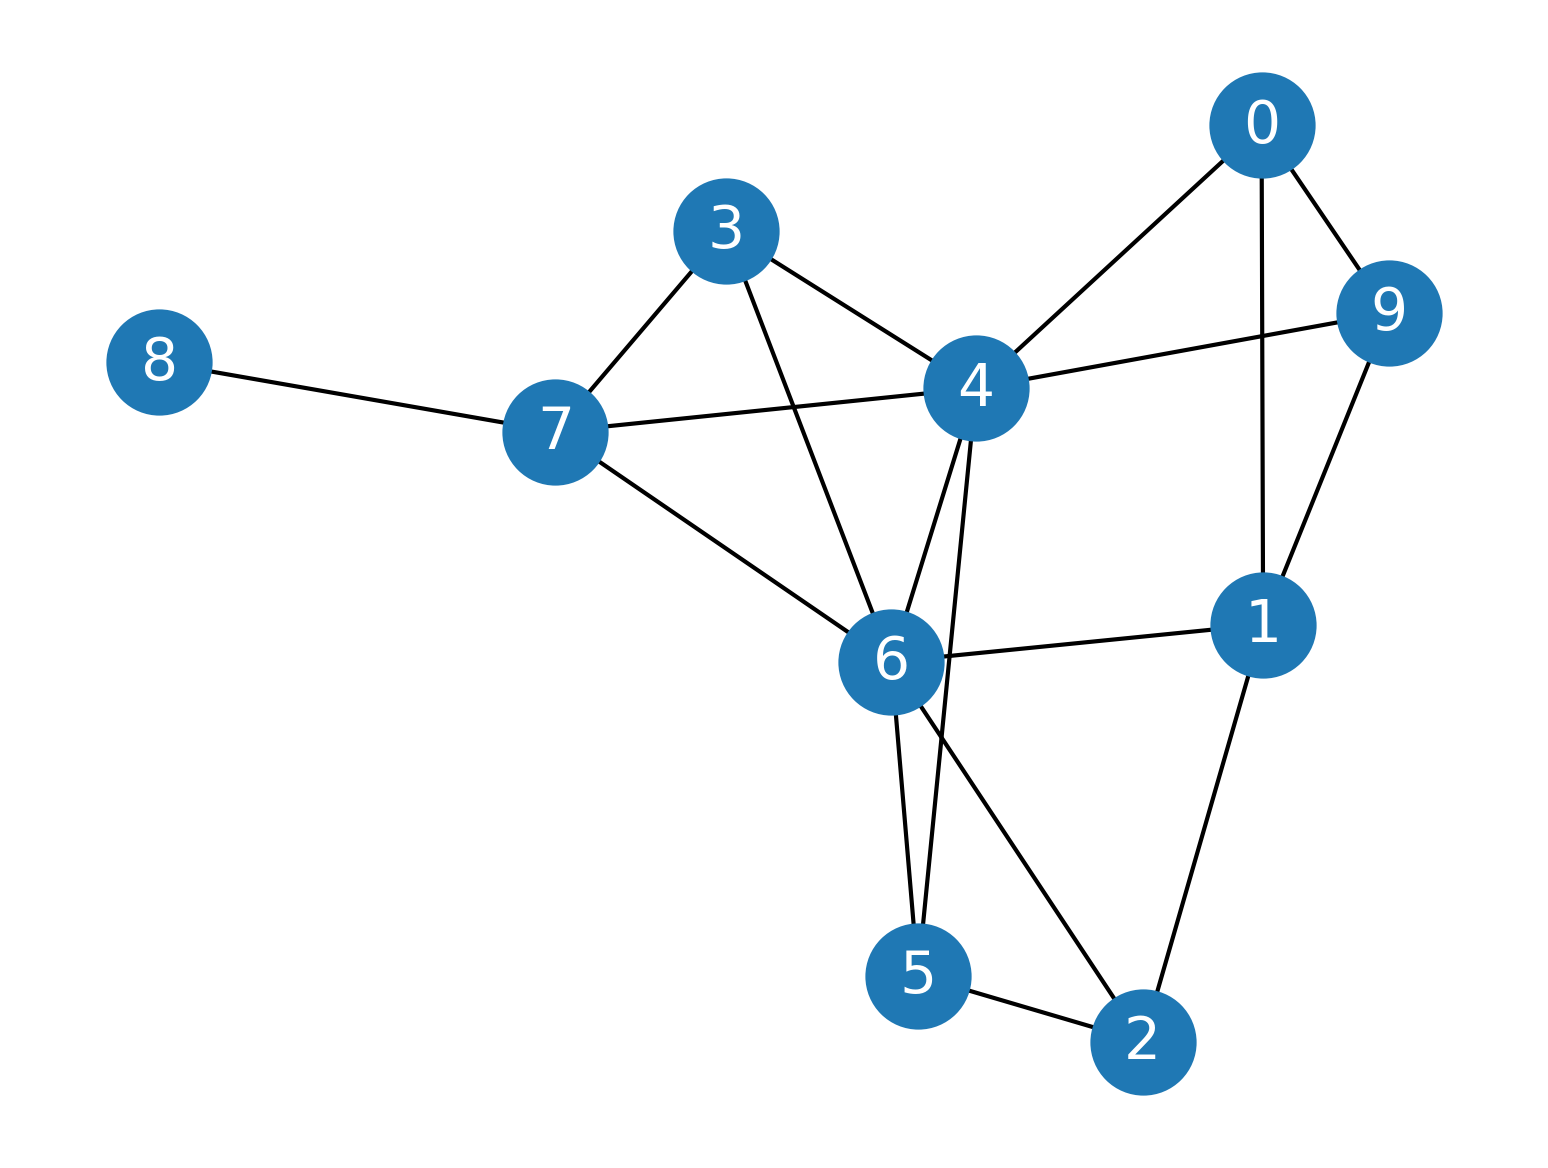

In [31]:
plt.figure(dpi=300)
plt.axis('off')
nx.draw_networkx(G,
pos=nx.spring_layout(G, seed=0),
node_size=600,
cmap='coolwarm',
font_size=14,
font_color='white'
)

In [32]:
#Observing what a random walk can look like
def random_walk(start, length):
    walk = [str(start)] # starting node
    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node
    return walk

In [33]:
print(random_walk(0, 10))

['0', '9', '1', '9', '1', '6', '3', '4', '3', '7', '6']


Implementing DeepWalk

In [34]:
G = nx.karate_club_graph()

In [35]:
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

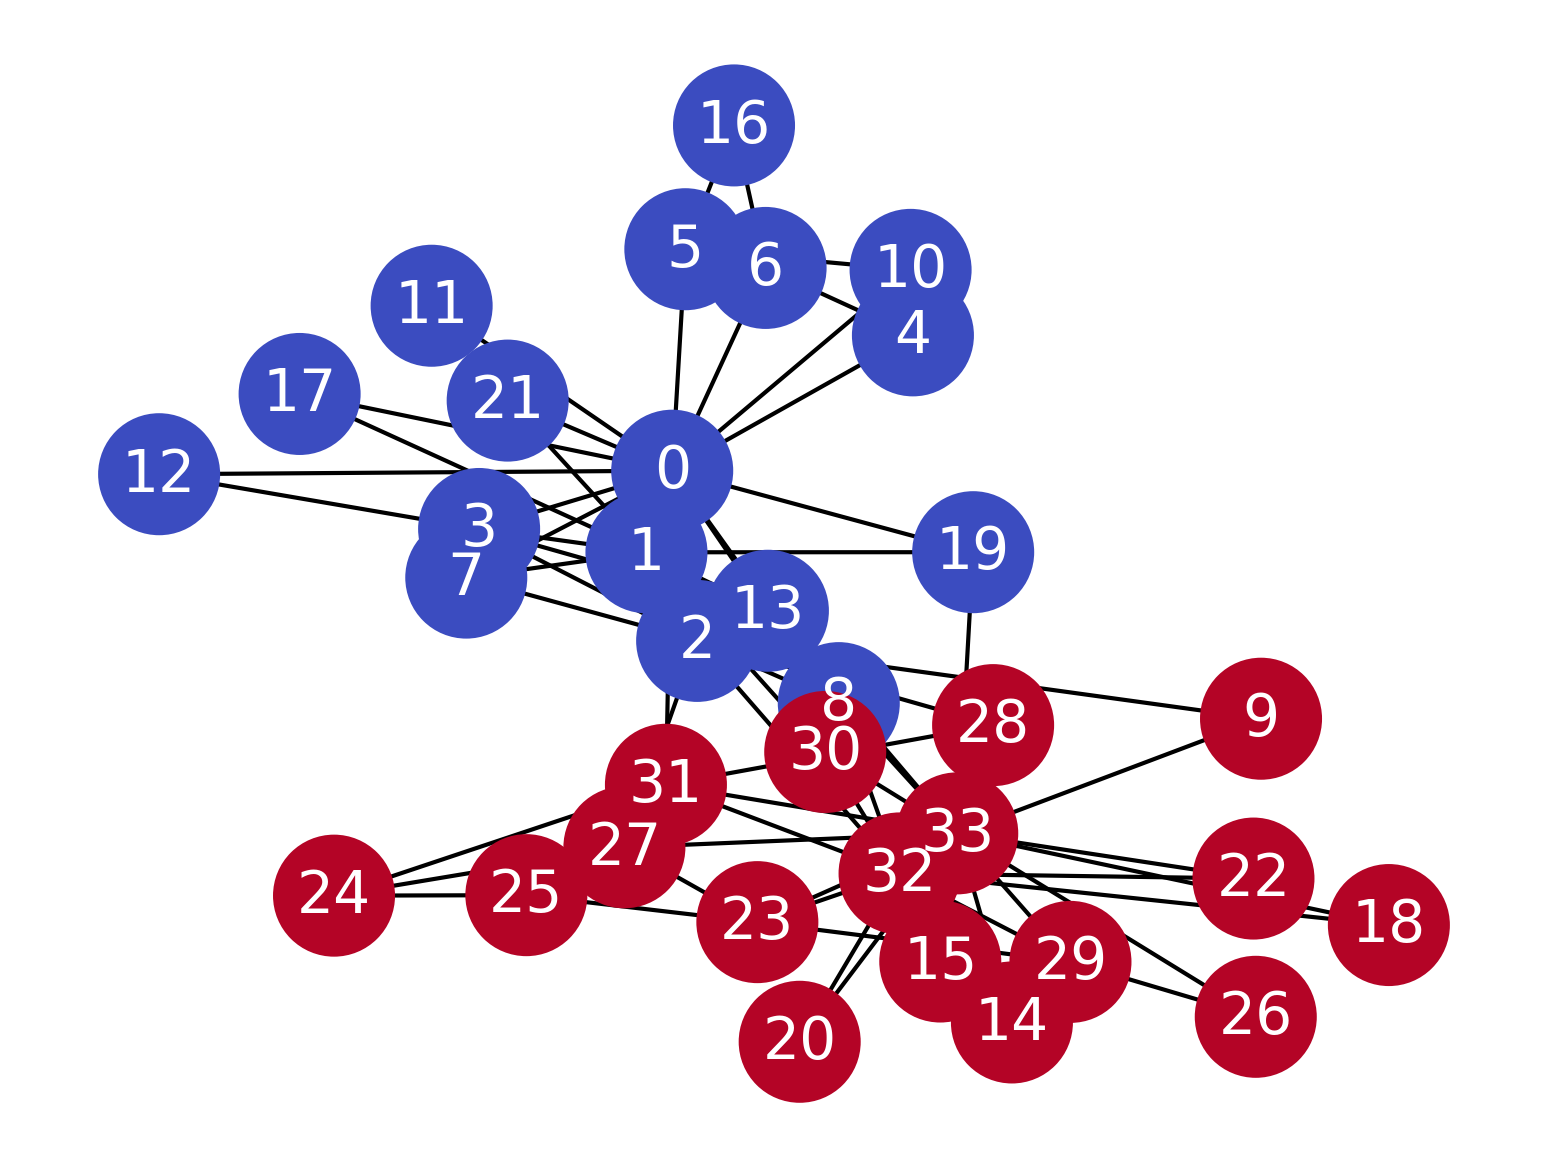

In [36]:
plt.figure(dpi=300)
plt.axis('off')
nx.draw_networkx(G,
pos=nx.spring_layout(G, seed=0),
node_color=labels,
node_size=800,
cmap='coolwarm',
font_size=14,
font_color='white'
)

In [37]:
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))

In [38]:
print(walks[0])

['0', '19', '1', '30', '32', '18', '33', '23', '25', '31', '24']


In [39]:
model = Word2Vec(walks,
hs=1, # Hierarchical softmax
sg=1, # Skip-gram
vector_size=100,
window=10,
workers=2,
seed=0)

In [40]:
model.train(walks, total_examples=model.corpus_count,
epochs=30, report_delay=1)

(186793, 897600)

In [41]:
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f' {similarity}')

Nodes that are the most similar to node 0:
 ('10', 0.7012161612510681)
 ('5', 0.6813808679580688)
 ('4', 0.6808027625083923)
 ('11', 0.6370553970336914)
 ('21', 0.6160571575164795)
 ('16', 0.6159341335296631)
 ('6', 0.6029186844825745)
 ('17', 0.5753394365310669)
 ('1', 0.570809006690979)
 ('12', 0.5536748170852661)


In [42]:
# Similarity between two nodes
print(f"Similarity between node 0 and 4: {model.
wv.similarity('0', '4')}")

Similarity between node 0 and 4: 0.6808027029037476


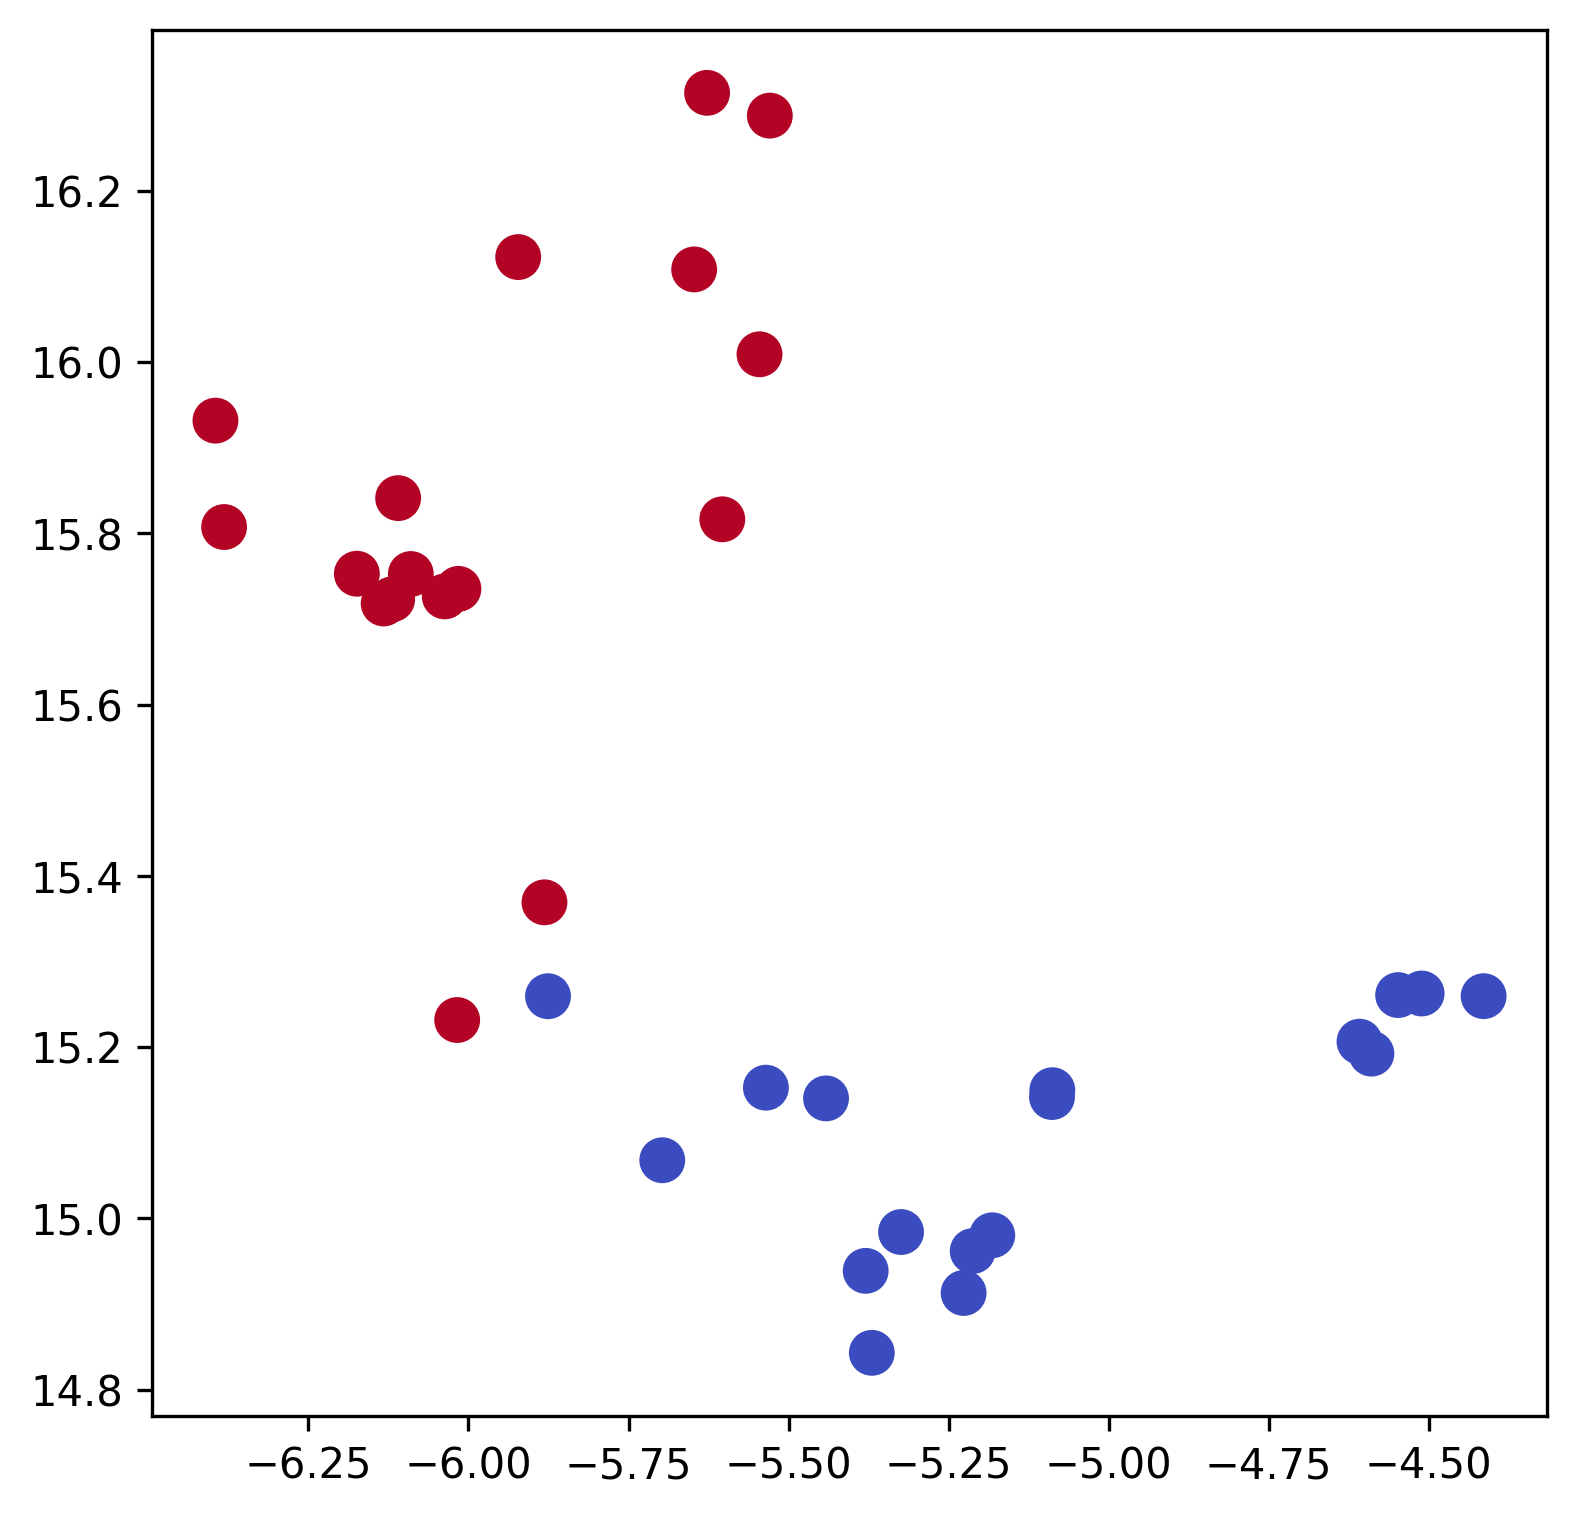

In [43]:
# To visualize it
from sklearn.manifold import TSNE
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in
range(len(model.wv))])
labels = np.array(labels)
tsne = TSNE(n_components=2,
    learning_rate='auto',
    init='pca',
    random_state=0).fit_transform(nodes_wv)
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels,
cmap="coolwarm")
plt.show()


In [44]:
# Creating a ML solution to classify the nodes since we can clearly draw a line separating the two classes and calculating the accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
train_mask = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
24, 26, 28]
test_mask = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
25, 27, 29, 30, 31, 32, 33]
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])
y_pred = clf.predict(nodes_wv[test_mask])
accuracy_score(y_pred, labels[test_mask])


0.8947368421052632